# Control flow
## Data 765 tutoring

Up until now your scripts in 765 have flowed linearly from top to bottom. Programs are rarely so neat—even in the data world!

Instead, programs branch and repeat depending on the context. Branching (conditional statements) and repeating (looping and iteration) are known collectively as **control flow.** Consider a small script that checks logins for some resource. The basic steps for that script may look like this:

1. Get username from a central database
2. Ask for user's password given retry counter > 0
3. Check user-password combo
4. IF the combination is correct grant access ELSE decrease the retry counter and go to the second step

This logic can be implemented in Python directly—a paean to Python's elegance.

In [ ]:
import time
from getpass import getuser, getpass

# Mock database password checker
def db_check_pwd(_username, password):
    if isinstance(_username, str) and isinstance(password, str):
        # Simulate checking password
        time.sleep(1)
        return password == "catsareamazing123"
    return False        

retry_limit = 5
username = getuser()

while retry_limit:
    password = getpass(f"Password for {username}: ")
    if db_check_pwd(username, password):
        print("Access granted!")
        # Instead of breaking here you'd grant access to
        # the resource of course.
        break
    else:
        print(f"Remaining tries: {retry_limit}")
        retry_limit -= 1

# Conditional statements (if/elif/else)

`if` statements check an expression's truthiness then execute _or_ skip a block of code based on the result. In other words, `if` statements branch based on an expression which allows programmers to control where their program's flow based on the environment, input, options, et cetera.

Understanding `if` statements is easier if you parse them as English first. IF _something is true_ THEN _do some action_. The "then" in terms of Python is just an indented block of code.

I'll begin with a few silly examples to demonstrate.

In [ ]:
awesome_band = "King Crimson"
# Retrieve a musician from stdin and convert to title case
# as well as strip white space for better comparisons.
yr_awesome_music = input("(One of) your favorite musicians? ").title().strip()

if yr_awesome_music == awesome_band:
    print("That's awesome! I love King Crimson too!")

We can "translate" the `if` statement to English to understand it better.

**Translation:** IF the awesome musician you like is the same as (equal to) the awesome band I like (King Crimson) THEN print/say "That's awesome! I love King Crimson too!"

The condition must be `True` for the block to execute.

The `if` statement is rather rude though. If the musician you provide is different than the band I provided then nothing is printed at all!

## `else`

`else` statements add a default if the `if` statement doesn't match.

To add onto the sentence from earlier: IF _something is true_ THEN _do some action_ ELSE _do this action instead_.

In [ ]:
awesome_band = "King Crimson"
# Retrieve a musician from stdin and convert to title case
# as well as strip white space for better comparisons.
yr_awesome_music = input("(One of) your favorite musicians? ").title().strip()

if yr_awesome_music == awesome_band:
    print("That's awesome! I love King Crimson too!")
else:
    print(f"I'm sure {yr_awesome_music} is cool too!")

Oops. That still sounds rude. No harm intended!

Let's translate that to English too.

**Translation:** IF the awesome musician you like is the same as (equal to) the awesome band I like (King Crimson) THEN print/say "That's awesome! I love King Crimson too!" ELSE say "I'm sure (your musician here) is cool too!"

## `elif`

I like more than one band. Let's add more conditions!

`elif` ("else if") adds more conditions to an `if` statement. They're basically extra `if` statements that are part of the same `if` block. Using `if` instead of `elif` to add more conditions results a new `if` block and thus doesn't continue the logic.

You can only have one `if` and one `else` per block but as many `elif` as you wish. Use `elif` to **continue an `if` statement.**

Finally, adding the last missing piece to the sentence from earlier: IF _something is true_ THEN _do some action_ ELSE IF _some other statement is true_ THEN _do this other action_ ELSE _do this action instead_.

In [ ]:
# Retrieve a musician from stdin and convert to title case
# as well as strip white space for better comparisons.
yr_awesome_music = input("(One of) your favorite musicians? ").title().strip()

if yr_awesome_music == "King Crimson":
    print("(Insert JoJoke here?!)")
elif yr_awesome_music == "Sonic Youth":
    print("Ah yes, my favorite band where the guitarists shove screwdrivers"
          "into their instruments to make pretty sounds.")
elif yr_awesome_music == "Pixies":
    print("ALIENS?")
elif not yr_awesome_music:
    print("Follow the instructions! 🤬😾")
else:
    print(f"I'm sure {yr_awesome_music} is cool too!")

Each `elif` acts like an `if` statement that is part of the entire `if` structure. In other words, each `elif` continues the main `if`. I said this above, but I'm repeating it because this concept is important but sometimes confusing. Use `elif` when you have multiple conditions that continue from the first `if`.

Next, notice that the last `elif` has a different condition than the preceding. `elif not yr_awesome_music` evaluates to `True` if the human at the keyboard input an empty answer. This condition is clearly different than the string equivalency expressions.

`elif` and `if` only need an expression that evaluates to a boolean or something "truthy" or "falsey". The `elif` statements don't need to be similar or related in any way.

Let's focus on the first sentence above a bit more. `if` statements can trigger based on expressions as long as they result in bools. That means:

In [1]:
truthy = True

if truthy:
    print("It's TRUE!")
    
def falsey_func():
    return False

if falsey_func():
    print("falsey_func is True.")
else:
    print("falsey_func is False.")
    
empty_string = ""

if not empty_string:
    print("empty_string is...empty.")

print(f"Empty list: {bool([])}")
print(f"Empty dict: {bool({})}")
print(f"None: {bool(None)}")
print(f"0: {bool(0)}")

It's TRUE!
falsey_func is False.
empty_string is...empty.
Empty list: False
Empty dict: False
None: False
0: False


`truthy` is already `True` so the `if` statement succeeds. You **don't** have to test if `truthy == True` because the value is a bool. Testing for truthiness is redundant; it's as if you wrote code like `if 5 > 3 == True` or `if True == True`.

`falsey_func()` returns `False` so `else` executes. You don't have to check if `falsey_func() == True`.

Empty strings and collections; `None`, 0, and likely others that I've forgotten coerce to `False` when treated as a boolean. Idiomatic Python (a.k.a. Pythonic code) opts for using these rational coercions rather than explicit checks.

## Nesting and collections

`if` statements may be nested to create tree-like structures like you saw in the homework.

In [2]:
location = {"celestial_body": "Earth",
            "loc_1": "New York",
            "loc_2": "Queens"}

if location["celestial_body"] == "Earth":
    if location["loc_1"] == "New York":
        if location["loc_2"] == "Queens":
            print("I store my video games in Queens!")
        elif location["loc_2"] == "Brooklyn":
            print("Brooklyn has awesome vegan doughnuts.")
        elif location["loc_2"] == "Manhattan":
            print("Chelsea is my favorite neighborhood in Manhattan.")
        elif location["loc_2"] == "Bronx":
            print("I haven't visited the Bronx that much")
        else:
            print(f"Is {location['loc_2']} out of N.Y.C.?")
    else:
        print(f"Do you take a lot of cat pictures in {location['loc_2']}/{location['loc_1']}?")
elif location["celestial_body"] == "Mars":
    print("The UAC's research facilities are located on Mars and Phobos.")
    if location["loc_1"] == "Tharsis":
        if location["loc_2"] == "Olympus Mons":
            print("Olympus Mons is a huge volcano. Stay safe!")
elif location["celestial_body"] in ["Saturn", "Neptune"]:
    print(f"I have property in {location['celestial_body']}!")
else:
    print(f"I'll have to visit {location['celestial_body']}")

I store my video games in Queens!


### Questions
1. Change the `location` `dict` so that Olympus Mons quote is displayed.
2. Explain the last `elif`.

# Iteration

Loops repeat an action until some condition is met. Like `if` statements, `while` loops evaluate an expression to decide whether to continue. `for` loops continue until an iterable is exhausted. Iterables are Python types that implement a `__next__()` method that returns the next element in a sequence until a possible end is reached.

Iteration is one of the most practical constructs in any programming languages. Let's take a look at Python's `for` loop!

In [3]:
cool_pokemon = ["Espeon", "Drampa", "Psyduck"]

for pokemon in cool_pokemon:
    print(f"{pokemon} is awesome!")

Espeon is awesome!
Drampa is awesome!
Psyduck is awesome!


The for loop traverses cool_pokemon by way of an iterator and executes the block of code until the iterator is depleted.

Unpacking a for loop looks something like:

In [4]:
pokemon_iter = iter(cool_pokemon)
pokemon = next(pokemon_iter)
print(f"{pokemon} is awesome!")
pokemon = next(pokemon_iter)
print(f"{pokemon} is awesome!")
pokemon = next(pokemon_iter)
print(f"{pokemon} is awesome!")

Espeon is awesome!
Drampa is awesome!
Psyduck is awesome!


In other words, each reference to each element is assigned to `pokemon` in turn until the iterator is exhausted. Python knows when the iterator is exhausted because a [StopIteration](https://docs.python.org/3/library/exceptions.html#StopIteration) exception is raised.

`while` loops test if an expression evaluates to `True` then executes a block of code.

In [5]:
i = 1

while i <= 17:
    if i % 2:
        print(i, end=' ')
    i += 1

1 3 5 7 9 11 13 15 17 

Notice the difference between the two. `for` loops continutally retrieves elements from an iterator until exhausted or some other condition is reached. `while` loops execute as long as the expression evaluates as `True` but doesn't have to traverse a collection.

You have to ensure that `while` conditions actually terminate or else your loop runs forever and contributes to global warming.

`break` and `continue` provide ways to stop a loop early or skip an iteration.

In [6]:
ages = [8, 24, 99, -1, 30, 25, 9, -50, 154]

for age in ages:
    if age < 0 or age > 120:
        print("Invalid age!")
        break
    else:
        print(age)

print("\nAnd now continue\n")
        
for age in ages:
    if age < 0 or age > 120:
        print("Invalid age!")
        continue
    else:
        print(age)

8
24
99
Invalid age!

And now continue

8
24
99
Invalid age!
30
25
9
Invalid age!
Invalid age!


Admittedly, this example is nonsensical but I couldn't think of a simple and practical example of using `break` and `continue`.

## Comprehensions

Comprehensions are a neat aspect of functional programming built into Python. Essentially, a comprehension constructs a collection from another collection.

Let's work with ages again. Say we have data that contains the ages above, but we want to preclude obviously wrong ages by setting them to `nan`. A comprehension is a simple tool to accomplish this without a longer `for` loop.

As a small note, we'd use NumPy or pandas over loops or comprehensions for this task.

In [7]:
cleaned_ages = [age for age in ages if age > 0 and age < 120]
print(cleaned_ages)

[8, 24, 99, 30, 25, 9]


A comprehension is cleaner than writing a `for` loop and appending to a new `list`. Essentially, we're transforming one collection into another collection without side effects such as modifying the original `list`.

The syntax is fairly Spartan, but you can see how a comprehension is like a condensed `for` loop.

One of the canonical examples is raising a list of numbers by an exponent.

In [8]:
cubes = [i**3 for i in range(10)]
print(cubes)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]


The syntax for comprehensions is essentially:

In [ ]:
[new_item for variable in collection if condition]

Comprehensions for other collections look about the same.

## Gathering data with a loop

Espeon has types: [{'slot': 1, 'type': {'name': 'psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'}}]


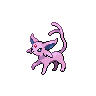

Espeon has types: [{'slot': 1, 'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}, {'slot': 2, 'type': {'name': 'dragon', 'url': 'https://pokeapi.co/api/v2/type/16/'}}]


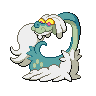

Espeon has types: [{'slot': 1, 'type': {'name': 'water', 'url': 'https://pokeapi.co/api/v2/type/11/'}}]


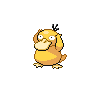

In [9]:
import io
import matplotlib.pyplot as plt
import time

from IPython.display import display
from PIL import Image
from requests import session

POKEAPI = "https://pokeapi.co/api/v2/pokemon/{}"

with session() as session:
    for pokemon in [196, 780, 54]:
        # Ideally we'd check for errors. But eh, this is an example.
        poke_data = session.get(POKEAPI.format(pokemon)).json()
        
        name = poke_data["name"]
        sprite_url = poke_data["sprites"]["front_default"]
        types = poke_data["types"]
        
        # Lazy formatting because this is an example.
        print(f"Espeon has types: {types}")
        
        # Draw sprite
        sprite = session.get(sprite_url).content
        with Image.open(io.BytesIO(sprite)) as im:
            display(im)
        
        # Backoff to avoid hitting the servers too hard.
        time.sleep(30)

A full solution would include error checking, caching the retrieved data, as well as saving the requested information to a file. Regardless, the above is still pretty cool, right?

# Battle ship example

I wrote a small example combining basically everything we learned plus next week's topic, functions. You may not understand every line of code, but you'll recognize most of the concepts shown and hopefully get the gist of the code as well.

In [ ]:
import random
from collections import namedtuple

# Constants
Y_MAX = 20
X_MAX = 20
EMPTY_CELL = '🌊'
# Player ships
PLAYER_ALIVE = '🚢'
# Graphic to display for hit ships.
PLAYER_DEAD = '💀'
# Player bomb that missed enemy ships.
BOMB = '💣'
# Player bomb that hit an enemy.
HIT_ENEMY = '💥'
# Laughing cat emoji for enemy misses.
ENEMY_MISS = '😹'

# AiState = namedtuple("AiState", ["state", "direction"])
Shape = namedtuple("Shape", ['y', 'x'])
# Ideally this would be a class and the functions below would be methods.
# But, you'll learn functions next week so this is a useful example.
BattleShip = namedtuple("BattleShip",
                        ["board",
                         "size",
                         "ships",
                         "ai_state"])

def _create_blank_board(size=Shape(Y_MAX, X_MAX)):
    """Create a board with y rows and x columns.
    
    Parameters
    ----------
    size: Shape
        A Shape object consisting of columns, rows.
        Must be positive.
        
    Returns
    -------
    list[list[str]]
        A y by x board filled with EMPTY_CELL.
    """
    # Fail on yucky incorrect inputs. 🤢
    assert(size.y > 0 and size.x > 0)
    
    # This looks way crazier than the earlier comprehensions, right?
    # The outer comprehension `[INNER for _y in range(x)] is executing the inner
    # comprehension `[0 for _y in range(y)] x amount of times.
    # A comprehension is much cleaner than a loop here even if it looks scarier.
    return [[EMPTY_CELL for _y in range(size.y)]
            for _x in range(size.x)]

def _random_coords(board_size):
    """Return a set of coordinates within the limits of board_size.
    
    Paramaters
    ----------
    board_size: Shape
    
    Returns
    -------
    Random coordinates within board_size as a Shape.
    """
    return Shape(random.randrange(0, board_size.y), random.randrange(0, board_size.x))

def _make_ships(board_size, amount=5):
    """Create 'amount' of random coordinates within board_size.
    
    Parameters
    ----------
    board_size: Shape
        Valid coordinates range.
    amount: integer
        Number of ships to return. Must be > 0.
    
    Returns
    -------
    List of randomly generated ships.
    """
    # Fail if amount is 0 or negative.
    assert(amount > 0)
    return [_random_coords(board_size) for _ in range(amount)]

def _running(battleship):
    """Check if both players are alive.
    
    Parameters
    ----------
    battleship: BattleShip
        Game instance
    
    Returns
    -------
    True if both players are alive. False otherwise.
    """
    return battleship.ships["player"] and battleship.ships["enemy"]

def new_board(size=Shape(Y_MAX, X_MAX)):
    """Create a new game instance.
    
    Parameters
    ----------
    size: Shape
        Size of game board.
    
    Returns
    -------
    BattleShip instance.
    """
    board = _create_blank_board(size)
    ships = {"player": _make_ships(size),
             "enemy": _make_ships(size)}
    
    for y, x in ships["player"]:
        board[y][x] = PLAYER_ALIVE
    
    return BattleShip(board, size, ships, set())

def _display_game(battleship):
    """Print game instance.
    
    Parameters
    ----------
    battleship: BattleShip
    """
    print(f"You have {len(battleship.ships['player'])} ship(s) remaining.")
    print(f"The enemy has {len(battleship.ships['enemy'])} ship(s) remaining.")
    
    for i, row in enumerate(battleship.board):
        end = ''
        # Add a space so that columns are aligned if i is a single digit
        if i < 10:
            end = ' '
        # Print column number
        print(i, end=end)
        
        for col in row:
            print(col, end='')
        print()
        
def _enemy_turn(battleship):
    """Basic enemy turn logic.
    
    Parameters
    ----------
    battleship: BattleShip
    """
    bomb = _random_coords(battleship.size)
    
    # ai_state contains already hit coordinates.
    # I could use a while loop here to check if each bomb
    # is unique, but that seems like a fun exercise for the class instead.
    if bomb in battleship.ai_state:
        print("The enemy's bomb hit a seagull. Poor seagull!")
    elif bomb in battleship.ships["player"]:
        print(f"The enemy hit your ship at {bomb.y}, {bomb.x}!")
        battleship.ships["player"].remove(bomb)
        battleship.board[bomb.y][bomb.x] = PLAYER_DEAD
    else:
        battleship.board[bomb.y][bomb.x] = ENEMY_MISS
        
    battleship.ai_state.add(bomb)
    
def run_game(battleship):
    while _running(battleship):
        _display_game(battleship)
        try:
            coords = input("Where will you shoot your cannon? (y, x): ").split(',')
            y = int(coords[0])
            x = int(coords[1])
            print(f"Shooting at {y}, {x}.")
            
            if (y, x) in battleship.ships["enemy"]:
                battleship.board[y][x] = HIT_ENEMY
                battleship.ships["enemy"].remove((y, x))
            else:
                battleship.board[y][x] = BOMB
        except (ValueError, IndexError):
            # ValueError is raised if a non-integer is provided (i.e. like j, 14).
            # IndexError is raised if the provided value is out of bounds.
            print("Your bomb was a dud! Make sure your coordinates are y, x.")
        finally:
            # The enemy should always have a turn even if the player goofed their coordinates.
            _enemy_turn(battleship)
    
    _display_game(battleship)
    print("Game over!")

battleship_default = new_board()
run_game(battleship_default)

# Questions

1. Which of the two code samples is correct and why?

In [ ]:
favorite_animal = "cat"

if favorite_animal == "cat":
    pass

if favorite_animal is "cat":
    pass

2. What's wrong with the following `while` loop?

**Don't run this cell.**

In [ ]:
i = 1

while i < 100:
    if i % 2 == 0:
        print(i)

3. What does the comprehension below do?
4. Which of the two loops are idiomatic Python?

In [ ]:
import random
numbers = [random.random() for _ in range(100)]

# First
numbers_sum = 0
for number in numbers:
    numbers_sum += number
print(f"Mean: {numbers_sum/len(numbers)}")

# Second
numbers_sum = 0
i = 0
while i < len(numbers):
    numbers_sum += numbers[i]
    i += 1
print(f"Mean: {numbers_sum/len(numbers)}")

5. Write a guessing game in Python. This is essentially a much smaller version of Battle Ship, but it still tests a lot of what you know.

* Generate a pseudorandom integer using [random](https://docs.python.org/3/library/random.html).
* Retrieve a guess with Python using [input()](https://docs.python.org/3/library/functions.html#input). You can just crash if the input isn't an integer.
* Print "too high" or "too low" based on the input.
* Stop the loop if the input is correct.

[Next: Functions](https://github.com/joshuamegnauth54/data765-intro-python-tutoring/blob/main/notebooks/04-functions.ipynb)